In [1]:
import pandas as pd

In [2]:
#excel_file_path1 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2018_trackman.xlsx'
#excel_file_path2 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2019_trackman.xlsx'
#excel_file_path3 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/象騎士(8.18).xlsx'
excel_file_path4 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2021_trackman.xlsx'
excel_file_path5 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2022_trackman.xlsx'
excel_file_path6 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman1.xlsx'
excel_file_path7 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/new/2023_trackman2.xlsx'
excel_file_path8 = 'C:/Users/ASUS/OneDrive/Documents/中信兄弟/Trackman/2024_trackman.xlsx'
sheet_name = 'Sheet1'

In [3]:
#track_2018 = pd.read_excel(excel_file_path1, sheet_name=sheet_name)
#track_2019 = pd.read_excel(excel_file_path2, sheet_name=sheet_name)
#track_Sanchez = pd.read_excel(excel_file_path3, sheet_name=sheet_name)

track_2021 = pd.read_excel(excel_file_path4, sheet_name=sheet_name)
track_2022 = pd.read_excel(excel_file_path5, sheet_name=sheet_name)
track_2023_1 = pd.read_excel(excel_file_path6, sheet_name=sheet_name)
track_2023_2 = pd.read_excel(excel_file_path7, sheet_name=sheet_name)
track_2024 = pd.read_excel(excel_file_path8, sheet_name=sheet_name)

In [4]:
col = ['GameID','Pitcher','PitchCall','OutsOnPlay','RunsScored','TaggedPitchType','RelSpeed','VertRelAngle','HorzRelAngle','SpinRate','RelHeight','RelSide','Extension','VertBreak','InducedVertBreak','HorzBreak','VertApprAngle','HorzApprAngle','ZoneSpeed','PlayResult','PitchCall','KorBB','ExitSpeed','Angle']

In [5]:
#track_2018= track_2018[col]
#track_2019= track_2019[col]
#track_Sanchez = track_Sanchez[col]

track_2021= track_2021[col]
track_2022= track_2022[col]
track_2023_1= track_2023_1[col]
track_2023_2= track_2023_2[col]
track_2024= track_2024[col]

In [6]:
#track_Sanchez

In [7]:
#data1 = pd.concat([track_2019, track_2018], ignore_index=True)
#data2 = pd.concat([track_Sanchez, track_2021], ignore_index=True)
data3 = pd.concat([track_2022, track_2021], ignore_index=True)
data4 = pd.concat([data3, track_2023_1], ignore_index=True)
data5 = pd.concat([data4, track_2023_2], ignore_index=True)
data = pd.concat([data5, track_2024], ignore_index=True)

In [8]:
data['Year'] = data['GameID'].str[:4]

In [9]:
year_items = data['Year'].unique()
year_items

array(['2022', '2021', '2023', '2024', nan], dtype=object)

In [10]:
data = data[~data['TaggedPitchType'].isin(['Undefined', 'Other'])]

In [11]:
data = data.loc[:, ~data.columns.duplicated()]
pitch_type_items = data['PitchCall'].unique()
pitch_type_items

array(['StrikeCalled', 'BallCalled', 'FoulBall', 'InPlay',
       'StrikeSwinging', 'HitByPitch', 'BallinDirt', nan,
       'BallIntentional', 'Undefined', 'FoulBallNotFieldable',
       'FoulBallFieldable'], dtype=object)

In [12]:
name_mapping = {
    'Fastball':'直球', 
    'ChangeUp':'變速球', 
    'Cutter':'卡特球', 
    'Curveball':'曲球', 
    'Splitter':'指叉球',
    'Slider':'滑球', 
    'Sinker':'伸卡球',
    'KnuckleBall':'彈指曲球', 
    'TwoSeamFastBall':'伸卡球', 
    'FourSeamFastBall':'直球', 
    'OneSeamFastBall':'伸卡球',
    'Changeup':'變速球', 
    'Knuckleball':'彈指曲球'  
}

# 新增一列"球員"，根据"Pitcher"列的值匹配中文名
data['球種'] = data['TaggedPitchType'].map(name_mapping)

In [13]:
pitch_type_items = data['球種'].unique()
pitch_type_items

array(['直球', '卡特球', '指叉球', '變速球', '滑球', '伸卡球', '曲球', '彈指曲球', nan],
      dtype=object)

In [14]:
data['SpeedDrop']=data['RelSpeed']-data['ZoneSpeed']

## 將"KorBB"資料填入'PlayResult'

In [15]:
data.loc[data['KorBB'].isin(['Walk']), 'PlayResult'] = data['KorBB']
data.loc[data['KorBB'].isin(['Strikeout']), 'PlayResult'] = data['KorBB']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79599 entries, 0 to 79606
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GameID            79548 non-null  object 
 1   Pitcher           79548 non-null  object 
 2   PitchCall         79547 non-null  object 
 3   OutsOnPlay        79548 non-null  float64
 4   RunsScored        79548 non-null  float64
 5   TaggedPitchType   79548 non-null  object 
 6   RelSpeed          79530 non-null  float64
 7   VertRelAngle      79529 non-null  float64
 8   HorzRelAngle      79529 non-null  float64
 9   SpinRate          79339 non-null  float64
 10  RelHeight         79529 non-null  float64
 11  RelSide           79529 non-null  float64
 12  Extension         79524 non-null  float64
 13  VertBreak         79217 non-null  float64
 14  InducedVertBreak  79217 non-null  float64
 15  HorzBreak         79217 non-null  float64
 16  VertApprAngle     79529 non-null  float64
 17

## 1.計算基礎數據 EX:被打擊率....等等

In [17]:
summary = data.groupby(['Pitcher','球種'])['PlayResult'].value_counts().unstack().fillna(0)

In [18]:
summary['PA']=summary['Single']+summary['Double']+summary['Triple']+summary['HomeRun']+summary['Error']+summary['FieldersChoice']+summary['Sacrifice']+summary['Strikeout']+summary['Walk']
summary['AB']=summary['Single']+summary['Double']+summary['Triple']+summary['HomeRun']+summary['Error']+summary['FieldersChoice']+summary['Strikeout']
summary['AVG']=(summary['Single']+summary['Double']+summary['Triple']+summary['HomeRun'])/summary['AB']
summary['SLG']=(summary['Single']+summary['Double']*2+summary['Triple']*3+summary['HomeRun']*4)/summary['AB']
summary['OBP']=(summary['Single']+summary['Double']+summary['Triple']+summary['HomeRun']+summary['Strikeout']+summary['Walk'])/summary['PA']

In [19]:
summary

PlayResult            CaughtStealing  Double  Error  FieldersChoice  HomeRun  \
Pitcher          球種                                                            
Anderson, Tanner 伸卡球             0.0     1.0    0.0             1.0      0.0   
                 卡特球             0.0     0.0    0.0             0.0      0.0   
                 曲球              0.0     0.0    0.0             0.0      0.0   
                 滑球              0.0     0.0    0.0             0.0      0.0   
                 直球              0.0     0.0    1.0             1.0      0.0   
...                              ...     ...    ...             ...      ...   
Yu, Tsung-Ju     變速球             0.0     0.0    0.0             0.0      0.0   
Yueh, Shao-Hua   曲球              0.0     0.0    0.0             0.0      0.0   
                 滑球              0.0     2.0    0.0             0.0      0.0   
                 直球              0.0     1.0    0.0             1.0      0.0   
                 變速球             0.0     0.0    0.0             2.0      0.0   

PlayResult             Out  Sacrifice  Single  StolenBase  Strikeout  Triple  \
Pitcher          球種                                                            
Anderson, Tanner 伸卡球  14.0        0.0     1.0         0.0        3.0     0.0   
                 卡特球   4.0        0.0     0.0         0.0        0.0     1.0   
                 曲球    1.0        0.0     0.0         0.0        2.0     0.0   
                 滑球    4.0        0.0     1.0         0.0        1.0     0.0   
                 直球    6.0        0.0     7.0         0.0        5.0     0.0   
...                    ...        ...     ...         ...        ...     ...   
Yu, Tsung-Ju     變速球   0.0        0.0     0.0         0.0        0.0     0.0   
Yueh, Shao-Hua   曲球    1.0        0.0     0.0         0.0        1.0     0.0   
                 滑球    7.0        0.0     2.0         0.0        0.0     0.0   
                 直球    6.0        1.0     8.0         0.0        2.0     0.0   
                 變速球   2.0        1.0     0.0         0.0        5.0     0.0   

PlayResult            Undefined  Walk    PA    AB       AVG       SLG  \
Pitcher          球種                                                     
Anderson, Tanner 伸卡球       43.0   2.0   8.0   6.0  0.333333  0.500000   
                 卡特球       13.0   0.0   1.0   1.0  1.000000  3.000000   
                 曲球        13.0   0.0   2.0   2.0  0.000000  0.000000   
                 滑球        25.0   0.0   2.0   2.0  0.500000  0.500000   
                 直球        66.0   5.0  19.0  14.0  0.500000  0.500000   
...                         ...   ...   ...   ...       ...       ...   
Yu, Tsung-Ju     變速球        1.0   0.0   0.0   0.0       NaN       NaN   
Yueh, Shao-Hua   曲球        12.0   0.0   1.0   1.0  0.000000  0.000000   
                 滑球        30.0   2.0   6.0   4.0  1.000000  1.500000   
                 直球        68.0   2.0  15.0  12.0  0.750000  0.833333   
                 變速球       24.0   0.0   8.0   7.0  0.000000  0.000000   

PlayResult                 OBP  
Pitcher          球種             
Anderson, Tanner 伸卡球  0.875000  
                 卡特球  1.000000  
                 曲球   1.000000  
                 滑球   1.000000  
                 直球   0.894737  
...                        ...  
Yu, Tsung-Ju     變速球       NaN  
Yueh, Shao-Hua   曲球   1.000000  
                 滑球   1.000000  
                 直球   0.866667  
                 變速球  0.625000  

[1073 rows x 18 columns]

## 2.whiff%

In [20]:
# 確保數據的正確性
data_col = data[['Pitcher','Year', '球種', 'PitchCall']]

# 按 Pitcher 和 球種 分組，並計算 PlayResult 的數量
summary2 = data_col.groupby(['Pitcher', 'Year','球種'])['PitchCall'].value_counts().unstack().fillna(0)

#summary2.columns = summary2.columns.drop

# 顯示結果
summary2


PitchCall                  BallCalled  BallIntentional  BallinDirt  FoulBall  \
Pitcher          Year 球種                                                       
Anderson, Tanner 2022 伸卡球         9.0              0.0         0.0      12.0   
                      卡特球         4.0              0.0         0.0       3.0   
                      滑球          6.0              0.0         0.0       2.0   
                      直球          6.0              0.0         0.0       4.0   
                      變速球         6.0              0.0         0.0       0.0   
...                               ...              ...         ...       ...   
Yueh, Shao-Hua   2023 變速球         2.0              0.0         3.0       2.0   
                 2024 曲球          1.0              0.0         0.0       0.0   
                      滑球          1.0              0.0         0.0       0.0   
                      直球          6.0              0.0         0.0       0.0   
                      變速球         1.0              0.0         0.0       0.0   

PitchCall                  FoulBallFieldable  FoulBallNotFieldable  \
Pitcher          Year 球種                                             
Anderson, Tanner 2022 伸卡球                0.0                   0.0   
                      卡特球                0.0                   0.0   
                      滑球                 0.0                   0.0   
                      直球                 0.0                   0.0   
                      變速球                0.0                   0.0   
...                                      ...                   ...   
Yueh, Shao-Hua   2023 變速球                0.0                   0.0   
                 2024 曲球                 0.0                   0.0   
                      滑球                 0.0                   1.0   
                      直球                 0.0                   2.0   
                      變速球                0.0                   0.0   

PitchCall                  HitByPitch  InPlay  StrikeCalled  StrikeSwinging  \
Pitcher          Year 球種                                                      
Anderson, Tanner 2022 伸卡球         0.0    11.0           6.0             1.0   
                      卡特球         0.0     4.0           3.0             0.0   
                      滑球          0.0     1.0           5.0             1.0   
                      直球          0.0     5.0           2.0             0.0   
                      變速球         0.0     2.0           0.0             0.0   
...                               ...     ...           ...             ...   
Yueh, Shao-Hua   2023 變速球         0.0     4.0           1.0             9.0   
                 2024 曲球          0.0     0.0           0.0             0.0   
                      滑球          0.0     0.0           0.0             0.0   
                      直球          1.0     2.0           1.0             0.0   
                      變速球         0.0     0.0           1.0             3.0   

PitchCall                  Undefined  
Pitcher          Year 球種              
Anderson, Tanner 2022 伸卡球        0.0  
                      卡特球        0.0  
                      滑球         0.0  
                      直球         0.0  
                      變速球        0.0  
...                              ...  
Yueh, Shao-Hua   2023 變速球        0.0  
                 2024 曲球         0.0  
                      滑球         0.0  
                      直球         0.0  
                      變速球        0.0  

[1976 rows x 11 columns]

In [21]:
total_pitches = data.groupby(['Pitcher','Year', '球種']).size()

summary2["Whiff%"]= summary2['StrikeSwinging']/total_pitches*100

summary2 = summary2.reset_index()

summary2 = summary2[['Pitcher','Year', '球種', 'Whiff%']]

summary2

PitchCall,Pitcher,Year,球種,Whiff%
0,"Anderson, Tanner",2022,伸卡球,2.564103
1,"Anderson, Tanner",2022,卡特球,0.000000
2,"Anderson, Tanner",2022,滑球,6.666667
3,"Anderson, Tanner",2022,直球,0.000000
4,"Anderson, Tanner",2022,變速球,0.000000
...,...,...,...,...
1971,"Yueh, Shao-Hua",2023,變速球,42.857143
1972,"Yueh, Shao-Hua",2024,曲球,0.000000
1973,"Yueh, Shao-Hua",2024,滑球,0.000000
1974,"Yueh, Shao-Hua",2024,直球,0.000000


## 計算平均和PR值

In [22]:
data_clean = data.dropna()

In [23]:
columns_to_group = ['RelSpeed','VertRelAngle','HorzRelAngle','SpinRate','RelHeight','RelSide','Extension','VertBreak','InducedVertBreak','HorzBreak','VertApprAngle','HorzApprAngle','SpeedDrop']

group_vars = ['Year', '球種']


grouped_stats = data_clean.groupby(group_vars).agg({
    **{col: ['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)] for col in columns_to_group}
})


grouped_stats.columns = [f'{col}_{stat}' for col, stat in grouped_stats.columns]


grouped_stats

RelSpeed_mean  RelSpeed_<lambda_0>  RelSpeed_<lambda_1>  \
Year 球種                                                             
2021 伸卡球      85.627622            84.267960            85.548860   
     卡特球      85.206436            83.873625            85.042060   
     指叉球      82.006780            80.291590            81.579265   
     曲球       74.918741            72.832243            75.335280   
     滑球       81.075578            79.235330            81.705200   
     直球       89.522933            87.797300            89.895570   
     變速球      81.474060            79.267520            81.385790   
2022 伸卡球      88.186737            85.983433            88.344300   
     卡特球      85.905269            84.868875            85.935440   
     指叉球      82.414720            80.729510            81.866670   
     曲球       75.262211            72.729100            75.710565   
     滑球       80.764218            78.676720            81.089945   
     直球       89.651197            88.014470            89.808660   
     變速球      81.850062            80.245460            82.288530   
2023 伸卡球      86.640970            84.808770            86.089350   
     卡特球      85.889002            84.501253            85.788755   
     指叉球      82.819525            80.965460            82.615590   
     曲球       76.288797            75.014165            77.027410   
     滑球       80.315993            78.603315            80.655525   
     直球       89.630566            88.257830            89.946660   
     變速球      82.024926            80.062725            82.431490   
2024 伸卡球      87.823071            86.291903            87.812450   
     卡特球      85.772211            84.387818            86.353505   
     指叉球      82.258241            80.496930            82.333530   
     曲球       74.729155            72.221655            75.479870   
     滑球       80.676711            78.991190            80.852230   
     直球       89.974562            88.572788            90.107300   
     變速球      81.740323            79.766545            82.167790   

          RelSpeed_<lambda_2>  VertRelAngle_mean  VertRelAngle_<lambda_0>  \
Year 球種                                                                     
2021 伸卡球            86.624630          -1.297139                -1.838719   
     卡特球            86.519775          -1.271902                -1.790423   
     指叉球            83.862345          -1.163556                -1.805553   
     曲球             77.494120           1.250582                 0.530941   
     滑球             83.460430          -0.173667                -1.025148   
     直球             91.519095          -1.744048                -2.512145   
     變速球            84.183570          -0.866586                -1.563787   
2022 伸卡球            90.745040          -1.290016                -2.176169   
     卡特球            86.845115          -1.006985                -1.551415   
     指叉球            84.131910          -0.695027                -1.418631   
     曲球             77.829680           1.242787                 0.600979   
     滑球             82.948865           0.037238                -0.669206   
     直球             91.300385          -1.664324                -2.313878   
     變速球            83.966405          -0.926262                -1.610006   
2023 伸卡球            88.601160          -1.140762                -1.755022   
     卡特球            87.294682          -1.209717                -1.734109   
     指叉球            84.744805          -1.128446                -1.925644   
     曲球             78.509570           1.003171                 0.299602   
     滑球             82.249918          -0.000958                -0.726551   
     直球             91.399240          -1.875725                -2.547086   
     變速球            84.248470          -0.862895                -1.585939   
2024 伸卡球            90.186410          -0.755845                -1.746648   
     卡特球            87.771585          -1.094511                -1.583985   
     指叉球      

In [24]:
#grouped_stats.to_excel('2021~2024各項目平均和4分位數(分球種).xlsx', index=True)

In [25]:
result = pd.DataFrame()

# Step 1: 計算 ['Year', 'Pitcher', 'TaggedPitchType'] 组合的平均值
grouped_means = data_clean.groupby(['Year', 'Pitcher', '球種'])[columns_to_group].mean().reset_index()

# Step 2: 在 grouped_means 上计算 PR 值
for col in columns_to_group:
    grouped_means[f'{col}_PR'] = grouped_means[col].rank(pct=True) * 100
    
# Step 3: 选择并展示结果
selected_columns = ['Year', 'Pitcher', '球種'] + [f'{col}_PR' for col in columns_to_group]
result = grouped_means[selected_columns]

result

,Year,Pitcher,球種,RelSpeed_PR,VertRelAngle_PR,HorzRelAngle_PR,SpinRate_PR,RelHeight_PR,RelSide_PR,Extension_PR,VertBreak_PR,InducedVertBreak_PR,HorzBreak_PR,VertApprAngle_PR,HorzApprAngle_PR,SpeedDrop_PR
0,2021,"Banuelos, Manny",卡特球,68.040621,62.365591,93.847073,94.324970,11.290323,4.301075,43.010753,58.721625,48.088411,35.842294,70.549582,94.563919,36.857826
1,2021,"Banuelos, Manny",滑球,39.784946,73.835125,85.125448,97.371565,25.089606,6.989247,31.899642,29.211470,25.866189,52.270012,39.545998,95.698925,12.126643
2,2021,"Banuelos, Manny",直球,98.387097,22.162485,99.044205,89.486260,27.180406,7.526882,60.334528,88.291517,77.598566,0.716846,91.338112,83.034648,89.426523
3,2021,"Banuelos, Manny",變速球,32.556750,75.686977,97.550777,26.224612,24.014337,6.690562,74.313023,32.377539,31.839904,0.836320,47.072879,78.733572,20.848268
4,2021,"Bollinger, Ryan",指叉球,41.158901,50.477897,92.174432,2.449223,70.669056,4.719235,42.831541,43.608124,47.968937,14.635603,37.335723,84.229391,70.250896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2024,"Yu, Ting-Wei",滑球,7.347670,89.605735,52.867384,44.384707,27.001195,51.851852,32.616487,13.022700,18.219833,41.457587,17.144564,28.076464,19.593787
1670,2024,"Yu, Ting-Wei",直球,49.402628,40.681004,24.970131,32.497013,28.016726,49.044205,59.677419,67.562724,75.567503,95.280765,68.219833,71.804062,63.142174
1671,2024,"Yu, Ting-Wei",變速球,4.659498,79.510155,46.535245,8.183990,37.156511,45.639188,87.813620,25.448029,58.960573,69.593787,35.603345,66.606930,3.823178
1672,2024,"Yueh, Shao-Hua",滑球,40.501792,76.583035,74.313023,73.655914,83.273596,26.284349,27.837515,28.614098,25.209080,28.136201,42.473118,45.459976,35.603345


In [26]:
#result = pd.DataFrame()


grouped_means = data_clean.groupby(['Year', 'Pitcher', '球種'])[columns_to_group].mean().reset_index()

grouped_means

,Year,Pitcher,球種,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,VertApprAngle,HorzApprAngle,SpeedDrop
0,2021,"Banuelos, Manny",卡特球,86.597666,-0.432884,3.011243,2565.151987,5.195496,-2.469876,5.402452,-29.866014,7.803018,-1.534598,-5.900992,2.738771,6.566992
1,2021,"Banuelos, Manny",滑球,81.893607,0.038705,2.028868,2679.837841,5.441857,-2.268089,5.276346,-39.693486,2.572899,4.974846,-7.167223,2.911957,5.953510
2,2021,"Banuelos, Manny",直球,93.290437,-1.734271,4.060952,2497.934826,5.472746,-2.209210,5.608285,-17.163413,15.346426,-17.851434,-4.963826,0.883607,8.001304
3,2021,"Banuelos, Manny",變速球,80.865880,0.156251,3.611071,1992.919931,5.429580,-2.275620,5.776570,-38.413250,4.222400,-17.404060,-6.903758,0.498221,6.177070
4,2021,"Bollinger, Ryan",指叉球,82.173940,-0.853362,2.829959,1183.339129,5.956495,-2.409610,5.401710,-34.774330,7.780120,-10.193610,-7.249689,1.017319,7.406390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2024,"Yu, Ting-Wei",滑球,74.800113,1.222699,-1.748972,2181.523251,5.470437,1.506883,5.280640,-52.002337,-0.689737,0.034067,-8.236290,-1.743107,6.141403
1670,2024,"Yu, Ting-Wei",直球,83.361779,-1.166216,-2.768654,2073.373550,5.486650,1.440139,5.600982,-25.945556,14.826259,16.051014,-6.001330,0.094388,7.190766
1671,2024,"Yu, Ting-Wei",變速球,73.017038,0.404788,-1.993042,1481.924273,5.583092,1.349166,6.021899,-41.614119,10.242428,10.488174,-7.305822,-0.106419,5.573849
1672,2024,"Yueh, Shao-Hua",滑球,82.012300,0.214493,-0.175181,2371.039590,6.130000,0.607640,5.219740,-40.136120,2.296180,-4.312010,-7.090000,-0.940421,6.537180


In [27]:
merged_data1 = pd.merge(result, grouped_means, on=['Year', 'Pitcher', '球種'], how='left')  #平均+PR
merged_data = pd.merge(grouped_means, summary2, on=['Year', 'Pitcher', '球種'], how='left')  #平均+揮空率
merged_data

,Year,Pitcher,球種,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,VertApprAngle,HorzApprAngle,SpeedDrop,Whiff%
0,2021,"Banuelos, Manny",卡特球,86.597666,-0.432884,3.011243,2565.151987,5.195496,-2.469876,5.402452,-29.866014,7.803018,-1.534598,-5.900992,2.738771,6.566992,0.000000
1,2021,"Banuelos, Manny",滑球,81.893607,0.038705,2.028868,2679.837841,5.441857,-2.268089,5.276346,-39.693486,2.572899,4.974846,-7.167223,2.911957,5.953510,25.714286
2,2021,"Banuelos, Manny",直球,93.290437,-1.734271,4.060952,2497.934826,5.472746,-2.209210,5.608285,-17.163413,15.346426,-17.851434,-4.963826,0.883607,8.001304,8.064516
3,2021,"Banuelos, Manny",變速球,80.865880,0.156251,3.611071,1992.919931,5.429580,-2.275620,5.776570,-38.413250,4.222400,-17.404060,-6.903758,0.498221,6.177070,0.000000
4,2021,"Bollinger, Ryan",指叉球,82.173940,-0.853362,2.829959,1183.339129,5.956495,-2.409610,5.401710,-34.774330,7.780120,-10.193610,-7.249689,1.017319,7.406390,38.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2024,"Yu, Ting-Wei",滑球,74.800113,1.222699,-1.748972,2181.523251,5.470437,1.506883,5.280640,-52.002337,-0.689737,0.034067,-8.236290,-1.743107,6.141403,0.000000
1670,2024,"Yu, Ting-Wei",直球,83.361779,-1.166216,-2.768654,2073.373550,5.486650,1.440139,5.600982,-25.945556,14.826259,16.051014,-6.001330,0.094388,7.190766,6.060606
1671,2024,"Yu, Ting-Wei",變速球,73.017038,0.404788,-1.993042,1481.924273,5.583092,1.349166,6.021899,-41.614119,10.242428,10.488174,-7.305822,-0.106419,5.573849,3.703704
1672,2024,"Yueh, Shao-Hua",滑球,82.012300,0.214493,-0.175181,2371.039590,6.130000,0.607640,5.219740,-40.136120,2.296180,-4.312010,-7.090000,-0.940421,6.537180,0.000000


In [28]:
columns_to_exclude = ['Year', 'Pitcher', '球種']
numeric_columns = [col for col in merged_data.columns if col not in columns_to_exclude]

whiff_correlation = merged_data[numeric_columns].corr()['Whiff%'].sort_values(ascending=False)
whiff_correlation

Whiff%              1.000000
RelHeight           0.064884
HorzApprAngle       0.013805
HorzRelAngle        0.011860
VertRelAngle        0.009483
HorzBreak          -0.000934
RelSide            -0.013794
Extension          -0.067028
RelSpeed           -0.093260
SpeedDrop          -0.106488
VertBreak          -0.107304
InducedVertBreak   -0.116552
SpinRate           -0.125239
VertApprAngle      -0.171332
Name: Whiff%, dtype: float64

In [29]:
def calculate_correlations(df):
    correlations = {}
    for pitch_type, group in df.groupby('球種'):
        correlation = group[numeric_columns].corr()['Whiff%'].sort_values(ascending=True)
        correlations[pitch_type] = correlation
    return pd.DataFrame(correlations)

# 计算相关系数
correlations_df = calculate_correlations(merged_data)


In [30]:
correlations_df

,伸卡球,卡特球,指叉球,曲球,滑球,直球,變速球
Extension,-0.015793,-0.072860,0.035710,-0.053279,-0.060607,0.079554,-0.051485
HorzApprAngle,0.120718,0.056289,0.002258,0.023300,0.106886,-0.080602,-0.159148
HorzBreak,0.138083,0.017030,0.168044,0.005929,0.043571,0.044970,0.010915
HorzRelAngle,-0.060420,0.053201,-0.122301,0.038966,0.118856,-0.062642,-0.059258
InducedVertBreak,-0.004455,-0.277253,-0.010382,0.006159,-0.021734,0.233436,-0.056022
RelHeight,-0.050162,-0.082708,0.131171,-0.020571,0.055240,0.139583,0.136503
RelSide,-0.006141,-0.044082,0.068000,-0.032781,-0.116439,0.065885,0.066096
RelSpeed,0.111147,0.099429,0.118957,0.035527,0.113913,0.267661,0.107313
SpeedDrop,0.071157,-0.046958,0.065947,-0.018138,0.074329,0.168946,0.066589
SpinRate,0.058241,0.160243,-0.071895,0.032427,0.022308,0.171434,-0.090107


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


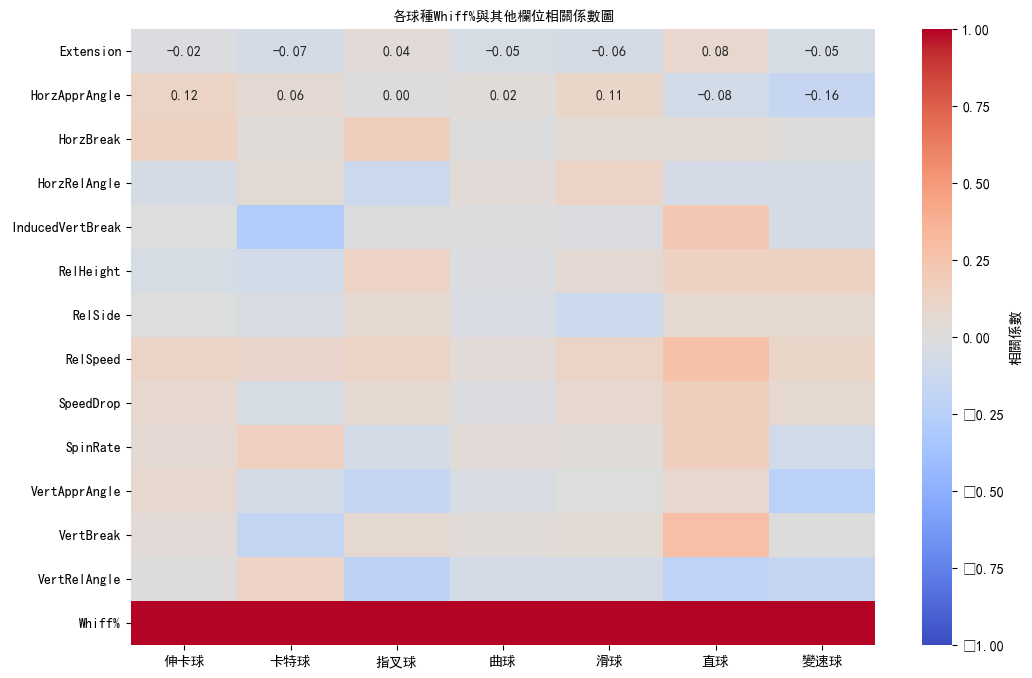

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import font_manager
font_path = 'C:/Windows/Fonts/simhei.ttf'

features = [
    'Extension', 'HorzApprAngle', 'HorzBreak', 'HorzRelAngle', 'InducedVertBreak',
    'RelHeight', 'RelSide', 'RelSpeed', 'SpeedDrop', 'SpinRate', 'VertApprAngle',
    'VertBreak', 'VertRelAngle', 'Whiff%'
]
df = pd.DataFrame(correlations_df, index=features)

font_prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            cbar_kws={'label': '相關係數'}, 
            annot_kws={"size": 10, "weight": 'bold', "fontproperties": font_prop})
plt.title('各球種Whiff%與其他欄位相關係數圖', fontproperties=font_prop)
plt.show()

# 只抓出特定數量的相似投手(計算相似性)

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 定義欄位
numeric_features = ['RelSpeed', 'VertBreak', 'InducedVertBreak', 'HorzBreak']
categorical_features = ['球種']  

# 数据预处理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 轉換
data_processed = preprocessor.fit_transform(grouped_means)

similar_pitchers = []

for i in range(data_processed.shape[0]):
    # 計算目前投手的所有距離
    distances = euclidean_distances(data_processed[i].reshape(1, -1), data_processed).flatten()
    
    # 找出目前投手的最大距離
    max_distance_i = np.max(distances)
    
    # 距離轉換為相似度(%)
    similarities = 1 / (1 + distances)
    similarity_percentages = similarities * 100
    
    # 找最小 排除自己
    top_indices = np.argsort(distances)[1:]
    
    count = 0  # 计算已加入的相似投手数量
    
    for sim_idx in top_indices:
        # 排除相同投手不同年份的情况
        if grouped_means['Pitcher'].iloc[i] != grouped_means['Pitcher'].iloc[sim_idx]:
            # 計算百分比
            similarity_percentage = (1 - distances[sim_idx] / max_distance_i) * 100
            
            similar_pitchers.append({
                'Pitcher': grouped_means['Pitcher'].iloc[i],
                'PitcherYear': grouped_means['Year'].iloc[i], 
                'SimilarPitcher': grouped_means['Pitcher'].iloc[sim_idx],
                'SimilarPitcherYear': grouped_means['Year'].iloc[sim_idx],
                '球種': grouped_means['球種'].iloc[sim_idx],
                'Similarity(%)': similarity_percentage
            })
            count += 1
        
        # 設定要找的數量
        if count >= 20:
            break

top_similar_pitchers_df = pd.DataFrame(similar_pitchers)

top_similar_pitchers_df



,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,球種,Similarity(%)
0,"Banuelos, Manny",2021,"Anderson, Tanner",2023,卡特球,98.666409
1,"Banuelos, Manny",2021,"Stankiewicz, Teddy",2021,卡特球,97.966243
2,"Banuelos, Manny",2021,"Stankiewicz, Teddy",2022,卡特球,96.920738
3,"Banuelos, Manny",2021,"Eppler, Tyler",2024,卡特球,96.782189
4,"Banuelos, Manny",2021,"Hall, Brooks",2023,卡特球,96.595290
...,...,...,...,...,...,...
33475,"Yueh, Shao-Hua",2024,"Gagnon, Drew",2024,直球,95.239006
33476,"Yueh, Shao-Hua",2024,"Yao, Chieh Hung",2022,直球,95.195381
33477,"Yueh, Shao-Hua",2024,"Liu, Yu Cheng",2022,直球,95.127296
33478,"Yueh, Shao-Hua",2024,"Ondrusek, Logan",2023,直球,95.060749


In [33]:
#top_similar_pitchers_df.to_excel('相似性計算(by VertBreak,InducedVertBreak,HorzBreak).xlsx', index=True)

# 計算全部球員(資料極大)

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# 定義數值與類別特徵
numeric_features = ['RelSpeed', 'VertBreak', 'InducedVertBreak', 'HorzBreak']
categorical_features = ['球種']

# 資料預處理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 進行資料轉換
data_processed = preprocessor.fit_transform(grouped_means)

similar_pitchers = []

for i in range(data_processed.shape[0]):
    # 計算該投手與其他投手的距離
    distances = euclidean_distances(data_processed[i].reshape(1, -1), data_processed).flatten()
    
    # 計算該投手的最大距離
    max_distance_i = np.max(distances)
    
    # 找到所有的相似投手，排除自己
    top_indices = np.argsort(distances)[1:]
    
    for sim_idx in top_indices:
        # 排除相同投手不同年份的情況
        if grouped_means['Pitcher'].iloc[i] != grouped_means['Pitcher'].iloc[sim_idx]:
            # 計算相似程度百分比，使用每個投手的專屬最大距離
            similarity_percentage = (1 - distances[sim_idx] / max_distance_i) * 100
            
            similar_pitchers.append({
                'Pitcher': grouped_means['Pitcher'].iloc[i],
                'PitcherYear': grouped_means['Year'].iloc[i], 
                'SimilarPitcher': grouped_means['Pitcher'].iloc[sim_idx],
                'SimilarPitcherYear': grouped_means['Year'].iloc[sim_idx],
                '球種': grouped_means['球種'].iloc[sim_idx],
                'Similarity(%)': similarity_percentage
            })

# 將結果轉換為 DataFrame
top_similar_pitchers_df2 = pd.DataFrame(similar_pitchers)

top_similar_pitchers_df2


,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,球種,Similarity(%)
0,"Banuelos, Manny",2021,"Anderson, Tanner",2023,卡特球,98.666409
1,"Banuelos, Manny",2021,"Stankiewicz, Teddy",2021,卡特球,97.966243
2,"Banuelos, Manny",2021,"Stankiewicz, Teddy",2022,卡特球,96.920738
3,"Banuelos, Manny",2021,"Eppler, Tyler",2024,卡特球,96.782189
4,"Banuelos, Manny",2021,"Hall, Brooks",2023,卡特球,96.595290
...,...,...,...,...,...,...
2784125,"Yueh, Shao-Hua",2024,"Yao, Chieh Hung",2021,曲球,3.737133
2784126,"Yueh, Shao-Hua",2024,"Chiu, Hao-Chun",2022,曲球,3.210721
2784127,"Yueh, Shao-Hua",2024,"Liao, Yi-Chung",2022,曲球,3.156474
2784128,"Yueh, Shao-Hua",2024,"Wan, Chao-Ching",2021,曲球,2.309079


In [74]:
pitcher_items = top_similar_pitchers_df['Pitcher'].unique()
pitcher_items

array(['Banuelos, Manny', 'Bollinger, Ryan', 'Brigham, Jake',
       'Chang, Hsi-Kai', 'Chang, Jui-Ling', 'Chao, Ching-Jung',
       'Chen, Hu', 'Chen, Hung-Wen', 'Chen, Kuan-Wei', 'Chen, Kuan-Yu',
       'Chen, Wei-Lin', 'Chen, Yu-Hsun', 'Chen, Yun-Wen',
       'Cheng, Chun-Jen', 'Cheng, Kai-Wen', 'Chiang, Chen-Yen',
       'Chiang, Cheng-Feng', 'Chiang, Shao-Ching', 'Chiu, Hao-Chun',
       'Chu, Chun-Hsiang', 'Concepcion, Yomar Flande',
       'Concepcion,?Yomar Flande', 'Covey, Dylan', 'De Paula, Jose',
       'Doubront, Felix', 'Dykxhoorn, Brock', 'Fan, Po-Chieh',
       'Fan, Yu-Yu', 'Gagnon, Drew', 'Grills, Evan', 'Gu Lin, Ruei-Yang',
       'Hagens, Bradin', 'Hsieh, Jung-Hao', 'Hsu, Chun-Yang',
       'Hsu, Jo-Hsi', 'Hu, Chih-Wei', 'Huang, En-Sih', 'Huang, Tzu-Peng',
       'Hung, Sheng-Chin', 'Kuan, Ta-Yuan', 'Kuo, Yu-Cheng',
       'Lai, Hung-Cheng', 'Lan, Kai-Ching', 'Lan,?Kai-Ching', 'Lee, C.C.',
       'Lee, Chi-Feng', 'Li Wu, Yung-Chin', 'Li, Cheng-Chen',
       'Li, Chie

In [112]:
pitcher = "Gu Lin, Ruei-Yang"
pitcher_year = "2024"
pitchtype = "滑球"
filtered_df = top_similar_pitchers_df2[(top_similar_pitchers_df2['Pitcher'] == pitcher) & (top_similar_pitchers_df2['PitcherYear'] == pitcher_year) & (top_similar_pitchers_df2['球種'] == pitchtype)]

In [113]:
filtered_df

,Pitcher,PitcherYear,SimilarPitcher,SimilarPitcherYear,球種,Similarity(%)
2166831,"Gu Lin, Ruei-Yang",2024,"Cheng, Chun-Jen",2021,滑球,75.198175
2167015,"Gu Lin, Ruei-Yang",2024,"Chiang, Kuo Hao",2022,滑球,72.476875
2167154,"Gu Lin, Ruei-Yang",2024,"Dykxhoorn, Brock",2022,滑球,69.913280
2167181,"Gu Lin, Ruei-Yang",2024,"Wang, Wei Chuang",2021,滑球,69.364615
2167187,"Gu Lin, Ruei-Yang",2024,"Chen, Kuan-Wei",2023,滑球,69.199886
...,...,...,...,...,...,...
2173056,"Gu Lin, Ruei-Yang",2024,"Yao, Chieh Hung",2022,滑球,29.271891
2173079,"Gu Lin, Ruei-Yang",2024,"Yao, Chieh Hung",2021,滑球,27.694034
2173087,"Gu Lin, Ruei-Yang",2024,"Chang, Jui-Ling",2022,滑球,27.031680
2173102,"Gu Lin, Ruei-Yang",2024,"Chang, Jui-Ling",2021,滑球,25.329715


In [114]:
#filtered_df.to_excel('古林睿煬-滑球.xlsx', index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33168\3875601190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SimilarPitcherWithYear'] = filtered_df['SimilarPitcher'] + ' (' + filtered_df['SimilarPitcherYear'].astype(str) + ')'


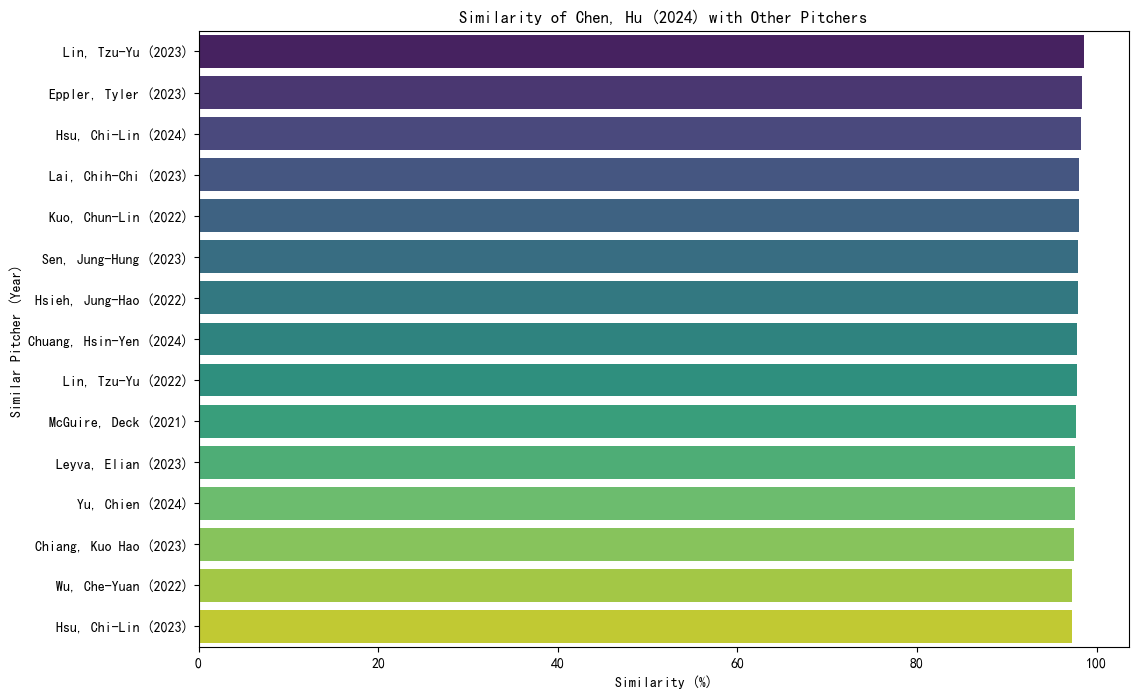

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df['SimilarPitcherWithYear'] = filtered_df['SimilarPitcher'] + ' (' + filtered_df['SimilarPitcherYear'].astype(str) + ')'

plt.figure(figsize=(12, 8))
sns.barplot(x='Similarity(%)', y='SimilarPitcherWithYear', data=filtered_df, palette='viridis')
plt.title(f'Similarity of {pitcher} ({pitcher_year}) with Other Pitchers')
plt.xlabel('Similarity (%)')
plt.ylabel('Similar Pitcher (Year)')
plt.show()

In [78]:
#top_similar_pitchers_df.to_excel('filtered_df.xlsx', index=True)